In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loaddataset 
dataset = pd.read_csv('diabetes.csv') 

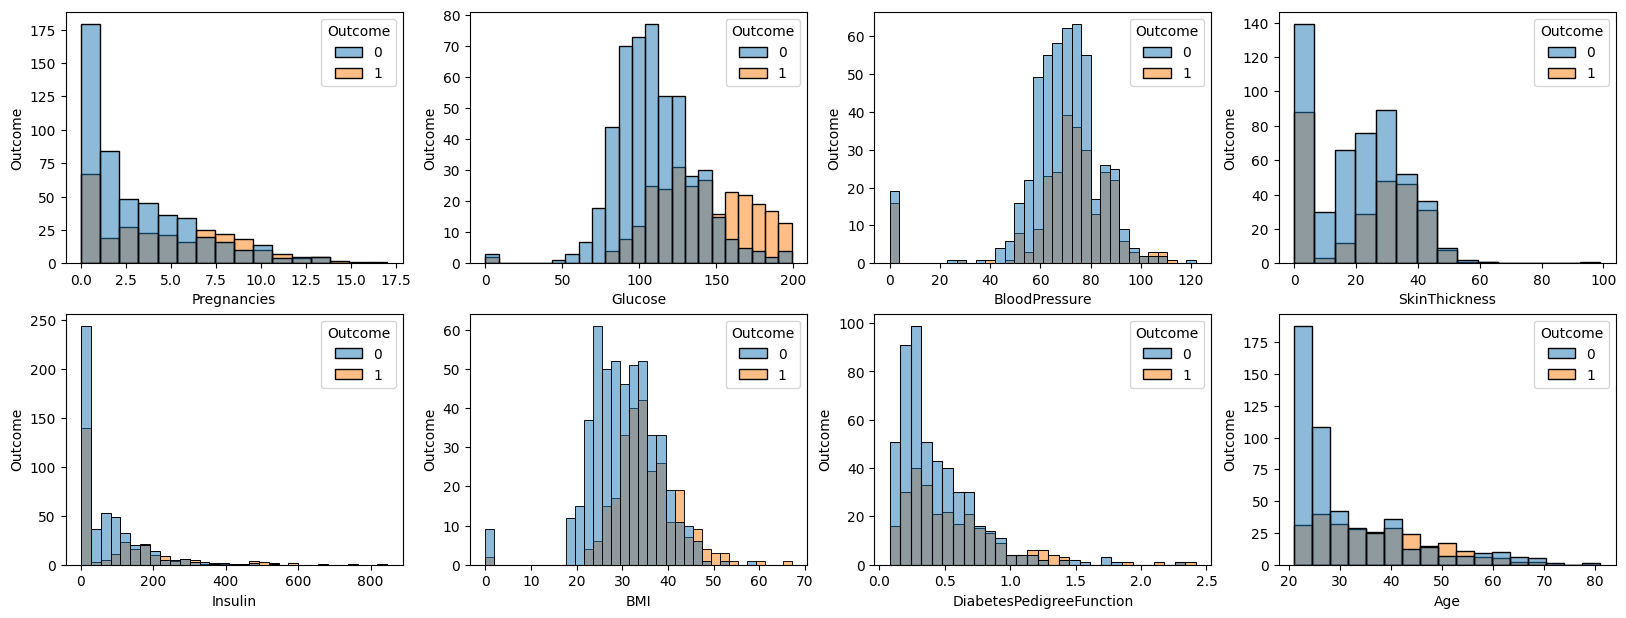

In [3]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
numFeatures = len(featureList)
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.histplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

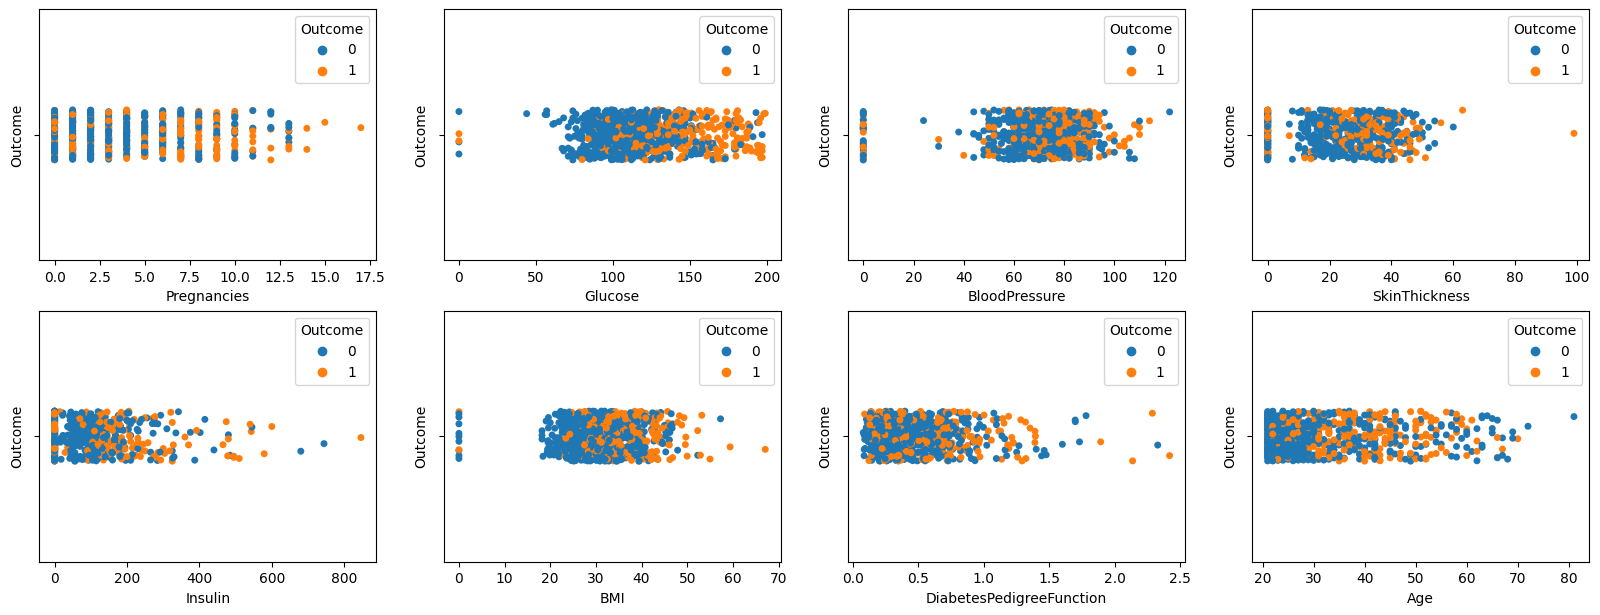

In [4]:
plotnumber=1
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.stripplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

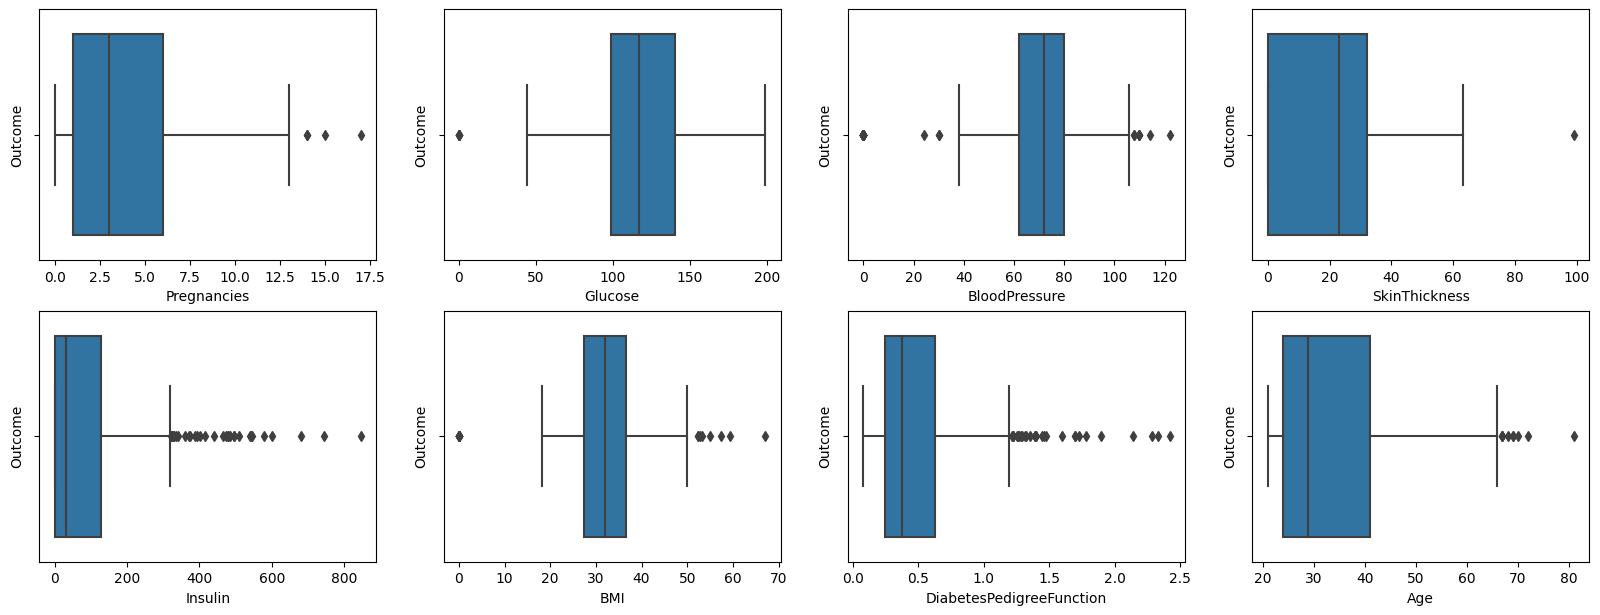

In [5]:
plotnumber=1
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=numFeatures):
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x=i,data=dataset,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

In [7]:
# fill the dataset with the median in places where the value is zero: 
dataset.loc[dataset['Glucose']==0,'Glucose']=np.median(dataset.Glucose)
dataset.loc[dataset['BloodPressure']==0,'BloodPressure']=np.median(dataset.BloodPressure)
dataset.loc[dataset['DiabetesPedigreeFunction']==0,'DiabetesPedigreeFunction']=np.median(dataset.DiabetesPedigreeFunction)
dataset.loc[dataset['BMI']==0,'BMI']=np.median(dataset.BMI)
dataset.loc[dataset['Insulin']==0,'Insulin']=np.median(dataset.Insulin)
dataset.loc[dataset['SkinThickness']==0,'SkinThickness']=np.median(dataset.SkinThickness)

In [8]:
# Lets go into the preprocessing phase 
from sklearn.preprocessing import MinMaxScaler
temp1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
scaling=MinMaxScaler()
# replace the columns of the dataset with its transformed version 
dataset.loc[:,temp1]=scaling.fit_transform(dataset.loc[:,temp1])

<Axes: >

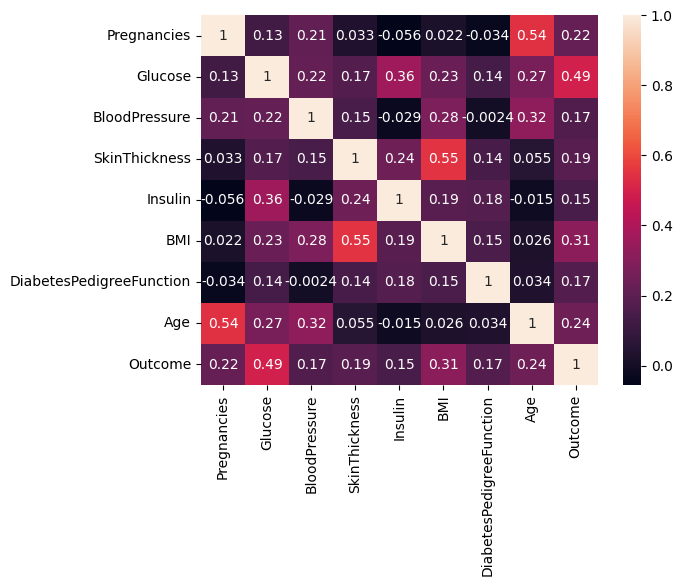

In [10]:
# check the correlations with each other 
heat = dataset.corr() 
sns.heatmap(heat, annot=True)

In [17]:
x=dataset.iloc[:,:-1]
y=dataset.Outcome
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [16]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define logistic regression model
logistic_model = LogisticRegression()

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
              'penalty': ['l1', 'l2'],                 # Penalty norm
              'solver': ['liblinear']}                 # Solver for optimization problem


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

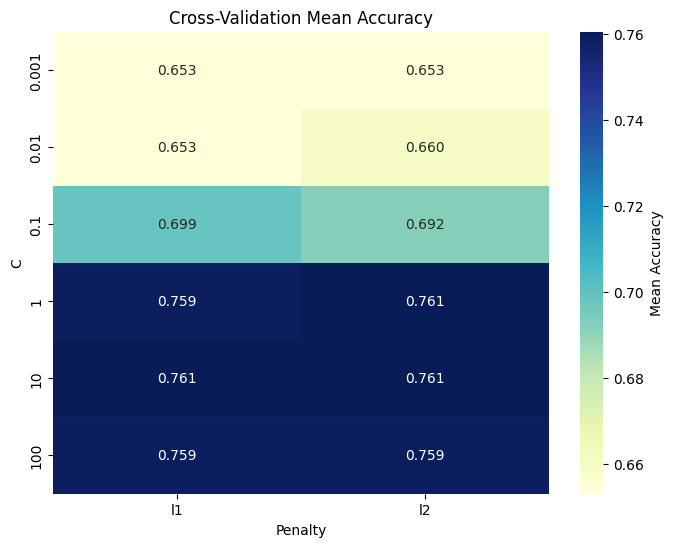

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['penalty']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(scores_mean, annot=True, fmt=".3f", xticklabels=param_grid['penalty'], yticklabels=param_grid['C'], cmap="YlGnBu")
plt.xlabel('Penalty')
plt.ylabel('C')
plt.title('Cross-Validation Mean Accuracy')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()


In [27]:
# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
logistic_y_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, logistic_y_predict)
print("Logistic Regression ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, logistic_y_predict))

Logistic Regression ----->
Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score:  0.7987012987012987
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.82      0.56      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



In [28]:
from sklearn.svm import SVC
# Define SVM model
svc_model = SVC()

# Define hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  # Kernel type

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

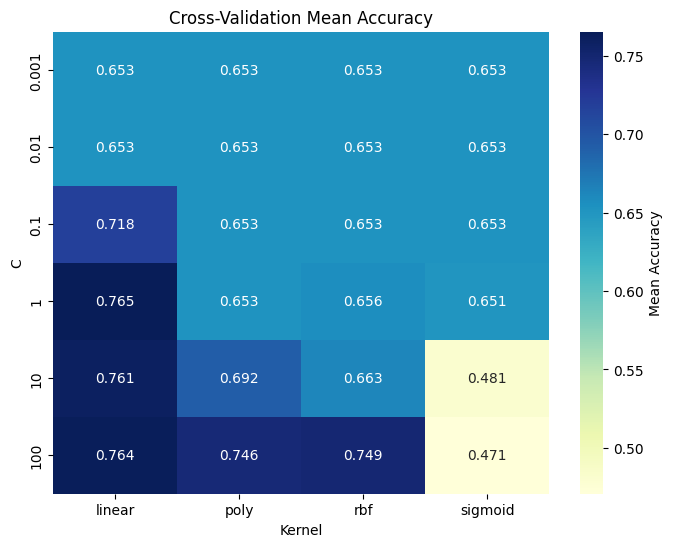

In [29]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['kernel']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(scores_mean, annot=True, fmt=".3f", xticklabels=param_grid['kernel'], yticklabels=param_grid['C'], cmap="YlGnBu")
plt.xlabel('Kernel')
plt.ylabel('C')
plt.title('Cross-Validation Mean Accuracy')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [30]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
svc_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svc_predict)
print("SVM ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, svc_predict))

SVM ----->
Best Parameters:  {'C': 1, 'kernel': 'linear'}
Accuracy Score:  0.7987012987012987
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.79      0.60      0.68        55

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



In [31]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree model
dt_model = DecisionTreeClassifier()

# Define hyperparameters to search
param_grid = {'criterion': ['gini', 'entropy'],  # Split criterion
              'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
              'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
              'min_samples_leaf': [1, 2, 4]}  # Minimum number of samples required to be at a leaf node


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Extract CV results
cv_results = grid_search.cv_results_
scores_mean = np.array(cv_results['mean_test_score']).reshape(len(param_grid['criterion']), 
                                                              len(param_grid['max_depth']), 
                                                              len(param_grid['min_samples_split']),
                                                              len(param_grid['min_samples_leaf']))

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(scores_mean.mean(axis=2).max(axis=2), annot=True, fmt=".3f", 
                      xticklabels=param_grid['min_samples_leaf'], 
                      yticklabels=param_grid['min_samples_split'], cmap="YlGnBu")
plt.xlabel('Min Samples Leaf')
plt.ylabel('Min Samples Split')
plt.title('Cross-Validation Mean Accuracy (Max Depth: Best)')

# Labeling color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Accuracy')

plt.show()

In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
dt_predict = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_predict)
print("Decision Tree ----->")
print("Best Parameters: ", best_params)
print("Accuracy Score: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, dt_predict))
